In [89]:
import pandas as pd
import numpy as np
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

In [91]:
df=pd.read_csv("Phishing_Data.csv")

In [69]:
df.head().T


,0,1,2,3,4
having_IP_Address,1,0,0,0,0
URL_Length,1,1,0,0,0
Shortining_Service,0,0,0,0,1
having_At_Symbol,0,0,0,0,0
double_slash_redirecting,1,0,0,0,0
Prefix_Suffix,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1
SSLfinal_State,-1,1,-1,-1,1
Domain_registeration_length,0,0,0,1,0
Favicon,0,0,0,0,0


In [56]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.122964,0.054560,0.125407,-0.254886,-0.185668,0.255700,0.018730,0.189739,...,0.196254,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,0.445440
std,0.316892,0.752690,0.328463,0.227166,0.331247,0.676170,0.802068,0.912332,0.798455,0.392175,...,0.397244,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.497115
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [92]:
df = df.applymap(str)


In [32]:
print(df.dtypes)

having_IP_Address              object
URL_Length                     object
Shortining_Service             object
having_At_Symbol               object
double_slash_redirecting       object
Prefix_Suffix                  object
having_Sub_Domain              object
SSLfinal_State                 object
Domain_registeration_length    object
Favicon                        object
port                           object
HTTPS_token                    object
Request_URL                    object
URL_of_Anchor                  object
Links_in_tags                  object
SFH                            object
Submitting_to_email            object
Abnormal_URL                   object
Redirect                       object
on_mouseover                   object
RightClick                     object
popUpWidnow                    object
Iframe                         object
age_of_domain                  object
DNSRecord                      object
web_traffic                    object
Page_Rank   

### Imbalance Check

In [71]:
df.Result.value_counts()

0    1362
1    1094
Name: Result, dtype: int64

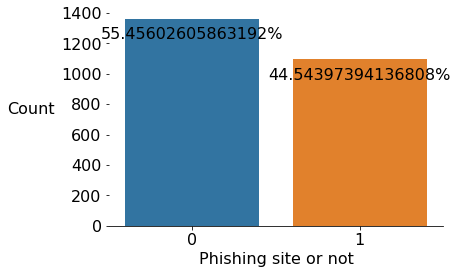

In [72]:
plt.figure(figsize=(6,4))
fig = sns.countplot(df.Result)
sns.despine(left=True)
fig.set_xlabel('Phishing site or not', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}%'.format(p.get_height()*100/len(df)), (x.mean(), y-150), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

In [93]:
from scipy.stats import kurtosis, skew,boxcox,boxcox_normmax 
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [94]:
cT = ChiSquare(df)

#Feature Selection
for var in df.columns:
    cT.TestIndependence(colX=var,colY="Result" ) 

having_IP_Address is IMPORTANT for Prediction
URL_Length is IMPORTANT for Prediction
Shortining_Service is IMPORTANT for Prediction
having_At_Symbol is NOT an important predictor. (Discard having_At_Symbol from model)
double_slash_redirecting is IMPORTANT for Prediction
Prefix_Suffix is IMPORTANT for Prediction
having_Sub_Domain is IMPORTANT for Prediction
SSLfinal_State is IMPORTANT for Prediction
Domain_registeration_length is IMPORTANT for Prediction
Favicon is NOT an important predictor. (Discard Favicon from model)
port is NOT an important predictor. (Discard port from model)
HTTPS_token is NOT an important predictor. (Discard HTTPS_token from model)
Request_URL is IMPORTANT for Prediction
URL_of_Anchor is IMPORTANT for Prediction
Links_in_tags is IMPORTANT for Prediction
SFH is IMPORTANT for Prediction
Submitting_to_email is NOT an important predictor. (Discard Submitting_to_email from model)
Abnormal_URL is IMPORTANT for Prediction
Redirect is IMPORTANT for Prediction
on_mouseov

In [95]:
del df['having_At_Symbol']
del df['Favicon']
del df['port']
del df['HTTPS_token']
del df['Submitting_to_email']
del df['RightClick']
del df['popUpWidnow']
del df['Iframe']
del df['Statistical_report']


In [96]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
rf = RandomForestClassifier(n_jobs=-1, class_weight=None, max_depth=7, random_state=0)
# Define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=0)

In [97]:
df1=df.copy()
X=df1.drop('Result',axis=1)
y=df1.pop('Result')
X=X.values

In [98]:
feat_selector.fit(X,y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	7
I

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                          criterion='gini', max_depth=7,
                                          max_features='auto',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=75, n_jobs=-1,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x000001FCF1A3CA68>,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         

In [99]:
# Check selected features
print(feat_selector.support_)
# Select the chosen features from our dataframe.
selected = X[:, feat_selector.support_]
print ("")
print ("Selected Feature Matrix Shape")
print (selected.shape)

[False False False False  True  True  True  True  True  True  True False
 False False False  True  True  True  True  True  True]

Selected Feature Matrix Shape
(2456, 13)


In [100]:
# number of selected features
print('\n Number of selected features:')
print(feat_selector.n_features_)


 Number of selected features:
13


In [101]:
# check ranking of features
print('\n Feature ranking:')
print(feat_selector.ranking_)
print('\n Initial features: ', df.columns.tolist())


 Feature ranking:
[2 3 5 8 1 1 1 1 1 1 1 6 6 8 4 1 1 1 1 1 1]

 Initial features:  ['having_IP_Address', 'URL_Length', 'Shortining_Service', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Result']


In [102]:
data = df1
feature_df = pd.DataFrame(data.columns.tolist())
feature_df['rank'] = feat_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
print('\n Top %d features:' % feat_selector.n_features_)
feature_df.columns = ['feature_name', 'Rank']
print(feature_df.head(feat_selector.n_features_))


 Top 13 features:
                   feature_name  Rank
0                 Links_in_tags     1
1                     Page_Rank     1
2                   web_traffic     1
3                     DNSRecord     1
4                 age_of_domain     1
5                  Google_Index     1
6                 URL_of_Anchor     1
7                   Request_URL     1
8        Links_pointing_to_page     1
9                SSLfinal_State     1
10            having_Sub_Domain     1
11                Prefix_Suffix     1
12  Domain_registeration_length     1


In [103]:
from sklearn.model_selection import train_test_split
# Splitting training & testing
validation_size = 0.20
seed = 9
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=validation_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1964, 21)
(492, 21)
(1964,)
(492,)


In [114]:
num_trees = 200
max_features = 3
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM',GradientBoostingClassifier()))

#Fit Models and Evaulate

results = []
names = []
scoring = 'accuracy'

#Cross Validation
for name, model in models:
 kfold = KFold(n_splits = 10, random_state=7)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.943999 (0.012456)
LDA: 0.935844 (0.017987)
KNN: 0.942456 (0.014437)
CART: 0.962833 (0.013492)
RF: 0.971991 (0.011236)
NB: 0.914980 (0.015234)
SVM: 0.949078 (0.011642)
GBM: 0.962323 (0.008271)


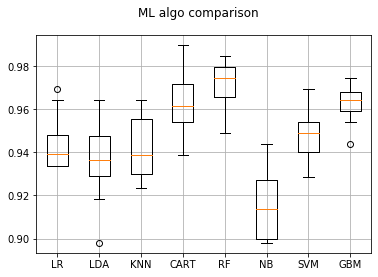

In [115]:
fig = plt.figure()
fig.suptitle('ML algo comparison')
ax = fig.add_subplot(111)
plt.grid()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [116]:
#create prediction model
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

#fit model
model.fit(X_train, Y_train)

#predict!
predictions = model.predict(X_test)

#check accuracy
print("Model --- RF")
print("Accuracy: {} ".format(accuracy_score(Y_test,predictions) * 100))
print(classification_report(Y_test, predictions))

Model --- RF
Accuracy: 97.96747967479675 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       281
           1       0.96      0.99      0.98       211

    accuracy                           0.98       492
   macro avg       0.98      0.98      0.98       492
weighted avg       0.98      0.98      0.98       492



In [117]:
## Function property of Shaypal5 github user
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap='Blues')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [118]:
cm=confusion_matrix(Y_test, predictions)

Figure(720x504)


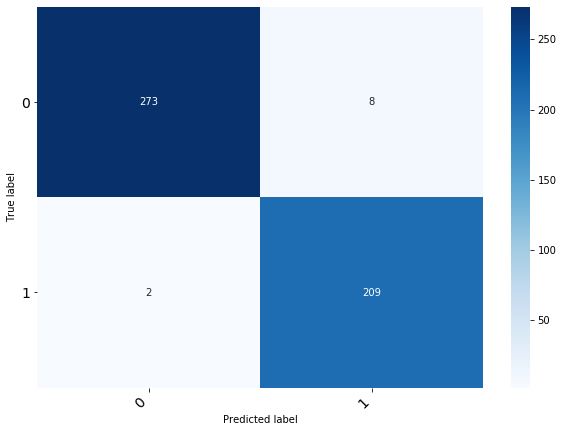

In [119]:
print(print_confusion_matrix(cm,[0,1]))

In [120]:
from sklearn.model_selection import RandomizedSearchCV
gbm = GradientBoostingClassifier()
params = {'learning_rate' : [0.1, 0.01, 0.001], 'n_estimators' : np.arange(100,500),
           'subsample' : [0.8, 0.9, 1.0], 'min_samples_split' : [0.01, 0.001],
           'max_depth' : np.arange(1,20), 'max_features' : ['auto', 'sqrt', 'log2'],
          }
rsearch = RandomizedSearchCV(gbm, params, cv=5, n_iter=10, n_jobs=5, scoring='accuracy', verbose=True)
rsearch.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   35.4s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:   39.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

Model --- Gradient Boost
Accuracy: 99.39024390243902 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       281
           1       0.99      1.00      0.99       211

    accuracy                           0.99       492
   macro avg       0.99      0.99      0.99       492
weighted avg       0.99      0.99      0.99       492

Figure(720x504)


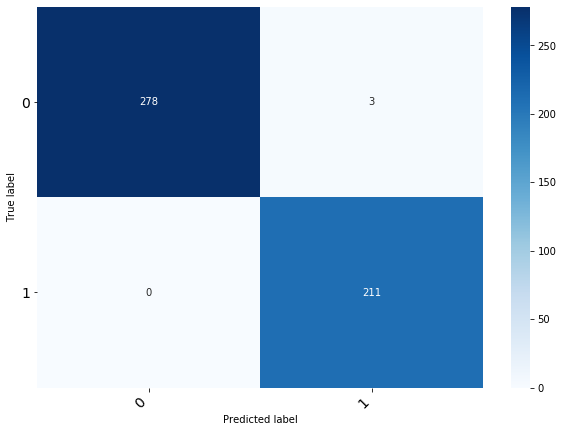

In [121]:
pred=rsearch.predict(X_test)
print("Model --- Gradient Boost")
print("Accuracy: {} ".format(accuracy_score(Y_test,pred) * 100))
print(classification_report(Y_test, pred))
cm=confusion_matrix(Y_test, pred)
print(print_confusion_matrix(cm,[0,1]))

In [122]:
from sklearn.model_selection import RandomizedSearchCV
RF = RandomForestClassifier()
params = {'criterion' : ['gini', 'entropy'], 'n_estimators' : np.arange(1,300),
            'min_samples_split' : [0.01, 0.001],
           'max_depth' : np.arange(1,50), 'max_features' : ['auto', 'sqrt', 'log2'],
          }
rsearch1 = RandomizedSearchCV(RF, params, cv=5, n_iter=10, n_jobs=5, scoring='accuracy', verbose=True)
rsearch1.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    6.4s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    6.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

Model --- Random Forest
Accuracy: 99.39024390243902 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       281
           1       0.99      1.00      0.99       211

    accuracy                           0.99       492
   macro avg       0.99      0.99      0.99       492
weighted avg       0.99      0.99      0.99       492

Figure(720x504)


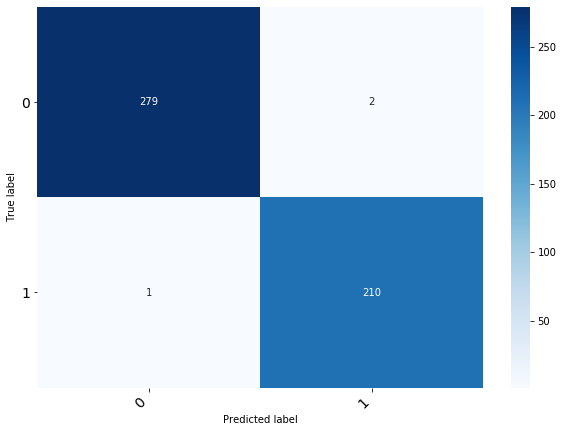

In [123]:
pred1=rsearch1.predict(X_test)
print("Model --- Random Forest")
print("Accuracy: {} ".format(accuracy_score(Y_test,pred1) * 100))
print(classification_report(Y_test, pred1))
cm1=confusion_matrix(Y_test, pred1)
print(print_confusion_matrix(cm1,[0,1]))

In [ ]:
Here Gradient boost seems to give the best output compared to Random Forest approach